## Resolução de Equações Diferenciais Utilizando SageMath

Seja $y$ uma função de $t$, e uma equação diferencial (1) definida na seguinte forma:

$$\begin{equation}
y''(t) + p(t)y' + q(t)y = g(t)
\end{equation}$$

Para que o sage reconheça uma derivada, uma função e igualdade, devemos utilizar de funções já embutidas. Segue a instrução para resolução de uma E.D.O.

1. Defina as variáveis utilizando `var("x1,x2,x3,...")` onde `x1,x2,x3,...` é cada uma das variáveis que você irá utilizar. Defina também as variáveis independentes.
2. Se y é função de t, então escreva `y = function('y')(t)`
3. Para derivar, usamos a função do Sage, `diff(função,variável,opcional:ordem_da_derivada)`
4. Uma boa prática é guardar a equação diferencial em uma variável.
5. Para resolver a equação diferencial utilize a função `desolve(equação_diferencial,variável_dependente,opcional:show_method=True)`

Com o objetivo de fazer também o gráfico. Foi criada função `desolvep` que é utilizada da mesma maneira que a função `desolve`. Nela tem um código RegEx, que faz a substituição das constantes por 0, para fazer a plotagem.

In [75]:
import re

def switch(text:str,switch_for="0")-> str:
    """
    Function to switch the constants in a result by a given number.
    Parameters:
        text: str of the discussion.
        switch_for: the given number of type str.
    Output:
        String which the constants is equal the given number.
    """
    
    return re.sub("[_][K][0-9]", str(switch_for), text)
                         
def desolvep(de:SR,dependent_variable:var,switch_for="0")-> Graphics:
    """
    Function which uses the built-in desolve sage function. Added the show method to print the result of desolve and
    a simple plot to visualize the result.
    Parameters:
        de: A Symbolyc Ring which represents the differential equation.
        dependent_variable: result in function fo the variable dependent_variable.
        switch_for: the given number of type str.
    Output:
        A graphics 2d object
    """
    result_method = desolve(de,dependent_variable,show_method=True)
    if result_method[1] == "variationofparameters":
        result_method[1] = "Variação dos Parâmetros"
    print("A solução geral da equação é: ")
    show(result_method[0])
    print(f"Pelo método de {result_method[1]}")
    text = str(desolve(de,dependent_variable,show_method=True)[0])
    p = plot(SR(switch(text,switch_for)),(-3*pi,3*pi),color="green",ymin=-2*pi,ymax=2*pi)
    return show(p,figsize=(3),aspect_ratio=1)

**EX:** Encontre a solução geral da equação $y'' + y' = 2 +t^2$

In [73]:
var("y,t")
y = function('y')(t)
dy = diff(y,t)
dy2 = diff(dy,t)

In [81]:
de = dy2 + dy == 2 + t^2
desolve(de,y)

1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

A solução geral da equação é: 


1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

Pelo método de Variação dos Parâmetros


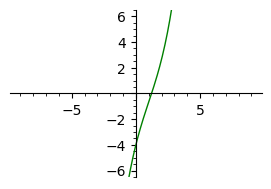

In [82]:
desolvep(de,y)

**EX:** Resolva $y'' + 2y' + y = (2+t)e^{-t}$

A solução geral da equação é: 


1/6*(t^3 + 6*t^2)*e^(-t) + (_K2*t + _K1)*e^(-t)

Pelo método de Variação dos Parâmetros


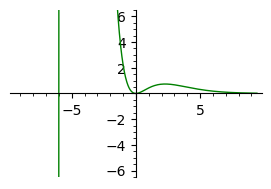

In [83]:
de = dy2 + 2*dy + y == (2+t)*e^(-t)
desolvep(de,y)

**EX:** Resolva $y'' +2y'+2y = e^t cos(t)$

A solução geral da equação é: 


(_K2*cos(t) + _K1*sin(t))*e^(-t) + 1/8*cos(t)*e^t + 1/8*e^t*sin(t)

Pelo método de Variação dos Parâmetros


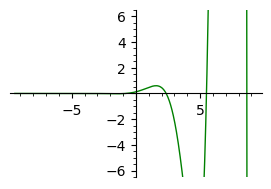

In [78]:
desolvep(dy2+2*dy+2*y==e^(t)*cos(t),y)

Perceba que o sage já fornece a solução pronta para essas EDO's. O método de variação dos parâmetros utiliza de 2 soluções da equação diferencial homogênea 